In [21]:
import pandas as pd
# Your job is to cluster the data using its location. 
# Apply the K-means clustering algorithm preferably with 3 clusters and plot them. 
# The dataset contains 250+ columns. Location:log_latitude_range and Location:log_longitude_range represents the location of a particular user. 

df = pd.read_csv('DM_Lab_12/dataset.csv')
df.head()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,1449601597,1.000371,0.007671,-0.016173,0.027860,0.998221,1.000739,1.003265,0.891038,6.684582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,1449601657,1.000243,0.003782,-0.002713,0.007046,0.998463,1.000373,1.002088,1.647929,6.684605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,1449601717,1.000811,0.002082,-0.001922,0.003575,0.999653,1.000928,1.002032,1.960286,6.684610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,1449601777,1.001245,0.004715,-0.002895,0.008881,0.999188,1.001425,1.003500,1.614524,6.684601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,1449601855,1.001354,0.065186,-0.096520,0.165298,1.000807,1.002259,1.003631,0.837790,6.682252,...,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,0.0,2


In [22]:
# print full columns
for col in df.columns:
    print(col)


timestamp
raw_acc:magnitude_stats:mean
raw_acc:magnitude_stats:std
raw_acc:magnitude_stats:moment3
raw_acc:magnitude_stats:moment4
raw_acc:magnitude_stats:percentile25
raw_acc:magnitude_stats:percentile50
raw_acc:magnitude_stats:percentile75
raw_acc:magnitude_stats:value_entropy
raw_acc:magnitude_stats:time_entropy
raw_acc:magnitude_spectrum:log_energy_band0
raw_acc:magnitude_spectrum:log_energy_band1
raw_acc:magnitude_spectrum:log_energy_band2
raw_acc:magnitude_spectrum:log_energy_band3
raw_acc:magnitude_spectrum:log_energy_band4
raw_acc:magnitude_spectrum:spectral_entropy
raw_acc:magnitude_autocorrelation:period
raw_acc:magnitude_autocorrelation:normalized_ac
raw_acc:3d:mean_x
raw_acc:3d:mean_y
raw_acc:3d:mean_z
raw_acc:3d:std_x
raw_acc:3d:std_y
raw_acc:3d:std_z
raw_acc:3d:ro_xy
raw_acc:3d:ro_xz
raw_acc:3d:ro_yz
proc_gyro:magnitude_stats:mean
proc_gyro:magnitude_stats:std
proc_gyro:magnitude_stats:moment3
proc_gyro:magnitude_stats:moment4
proc_gyro:magnitude_stats:percentile25
proc_g

In [23]:
for col in df.columns:
    if 'location' in col:
        print(col)

location:num_valid_updates
location:log_latitude_range
location:log_longitude_range
location:min_altitude
location:max_altitude
location:min_speed
location:max_speed
location:best_horizontal_accuracy
location:best_vertical_accuracy
location:diameter
location:log_diameter
location_quick_features:std_lat
location_quick_features:std_long
location_quick_features:lat_change
location_quick_features:long_change
location_quick_features:mean_abs_lat_deriv
location_quick_features:mean_abs_long_deriv


In [24]:
for col in df.columns:
    if 'label:' in col:
        print(col)

label:LYING_DOWN
label:SITTING
label:FIX_walking
label:FIX_running
label:BICYCLING
label:SLEEPING
label:LAB_WORK
label:IN_CLASS
label:IN_A_MEETING
label:LOC_main_workplace
label:OR_indoors
label:OR_outside
label:IN_A_CAR
label:ON_A_BUS
label:DRIVE_-_I_M_THE_DRIVER
label:DRIVE_-_I_M_A_PASSENGER
label:LOC_home
label:FIX_restaurant
label:PHONE_IN_POCKET
label:OR_exercise
label:COOKING
label:SHOPPING
label:STROLLING
label:DRINKING__ALCOHOL_
label:BATHING_-_SHOWER
label:CLEANING
label:DOING_LAUNDRY
label:WASHING_DISHES
label:WATCHING_TV
label:SURFING_THE_INTERNET
label:AT_A_PARTY
label:AT_A_BAR
label:LOC_beach
label:SINGING
label:TALKING
label:COMPUTER_WORK
label:EATING
label:TOILET
label:GROOMING
label:DRESSING
label:AT_THE_GYM
label:STAIRS_-_GOING_UP
label:STAIRS_-_GOING_DOWN
label:ELEVATOR
label:OR_standing
label:AT_SCHOOL
label:PHONE_IN_HAND
label:PHONE_IN_BAG
label:PHONE_ON_TABLE
label:WITH_CO-WORKERS
label:WITH_FRIENDS


In [25]:
# drop nan values from the columns
df = df.dropna(subset=['location:log_latitude_range', 'location:log_longitude_range'])

In [26]:
df['location:log_latitude_range']

1       0.000079
2       0.051085
3       0.014225
4       0.016058
5       0.006312
          ...   
3955    0.000462
3956    0.000457
3957    0.000463
3958    0.000457
3959    0.000462
Name: location:log_latitude_range, Length: 2966, dtype: float64

In [27]:
df['location:log_longitude_range']

1       0.000112
2       0.042162
3       0.020967
4       0.011644
5       0.009386
          ...   
3955    0.001768
3956    0.001752
3957    0.001776
3958    0.001753
3959    0.001757
Name: location:log_longitude_range, Length: 2966, dtype: float64

<Axes: xlabel='location:log_latitude_range', ylabel='location:log_longitude_range'>

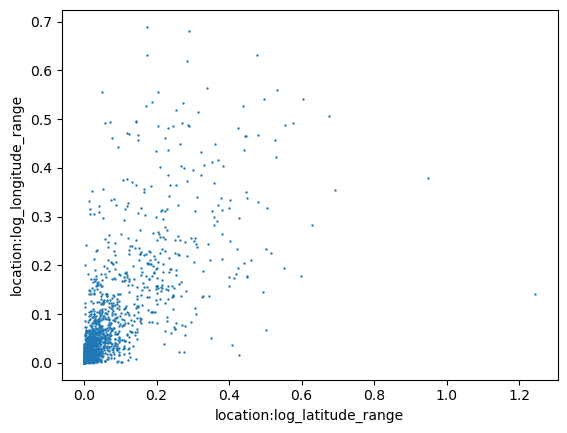

In [28]:
df.plot.scatter(x='location:log_latitude_range', y='location:log_longitude_range', s=0.5)

In [29]:
from sklearn.cluster import KMeans
X = df[['location:log_latitude_range', 'location:log_longitude_range']]
cls = KMeans(init='k-means++', n_clusters=3, n_init=10)
cls.fit(X)

c:\Users\ammar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


KMeans(n_clusters=3, n_init=10)

In [30]:
X['predicted_label'] = cls.labels_.astype(int)
X.head()

C:\Users\ammar\AppData\Local\Temp\ipykernel_31460\2143900944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['predicted_label'] = cls.labels_.astype(int)


,location:log_latitude_range,location:log_longitude_range,predicted_label
1,0.000079,0.000112,0
2,0.051085,0.042162,0
3,0.014225,0.020967,0
4,0.016058,0.011644,0
5,0.006312,0.009386,0


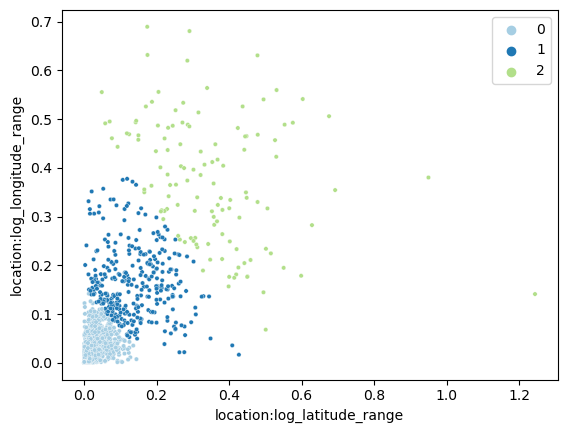

In [31]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.scatterplot(x='location:log_latitude_range', y='location:log_longitude_range', hue='predicted_label', data=X, palette='Paired', s=10)
plt.legend(loc='upper right')

([<matplotlib.patches.Wedge at 0x246d6e20cd0>,
 [Text(-0.6006539007080504, 0.921528562533036, 'label:SITTING'),
  Text(0.13078641719305958, -1.0921972867013556, 'label:LYING_DOWN'),
  Text(0.6756339685528304, -0.8680545723268515, 'label:FIX_running'),
  Text(0.8359477774569976, -0.7149764425243018, 'label:FIX_walking'),
  Text(1.0639815349474109, -0.27918326112242436, 'label:OR_standing')],
 [Text(-0.32762940038620925, 0.5026519431998379, '68.4%'),
  Text(0.07133804574166885, -0.5957439745643758, '17.0%'),
  Text(0.3685276192106347, -0.4734843121782826, '0.2%'),
  Text(0.4559715149765441, -0.3899871504678009, '6.2%'),
  Text(0.5803535645167694, -0.15228177879404964, '8.2%')])

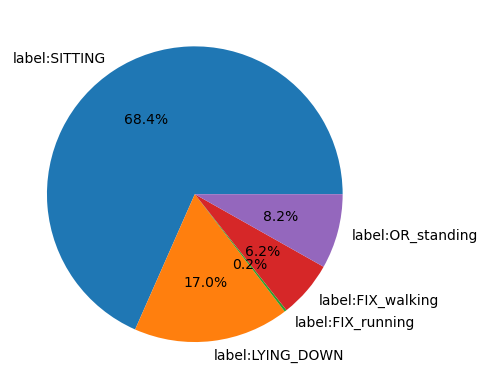

In [32]:
# After clustering the data, your job is to find the Activity performed by the user at any of the clustered locations. 
# Take only Sitting, Lying_down, Fix_running, Fix_walking, and OR_standing activities and plot them in percentages

X = df[['label:SITTING', 'label:LYING_DOWN', 'label:FIX_running', 'label:FIX_walking', 'label:OR_standing']]

plt.pie(X.sum(), labels=X.columns, autopct='%1.1f%%')